In [25]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns




In [26]:
data = pd.read_csv('StudentsPerformance.csv')

# getting the shape of the data
print(data.shape)

(1000, 8)


In [27]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [30]:
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <Axes: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=6.19E-02'}, xlabel='math score', ylabel='gender'>,
         <Axes: title={'center': 'F=4.75E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=3.79E-02'}, xlabel='math score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=1.33E-02'}, xlabel='math score', ylabel='lunch'>,
         <Axes: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

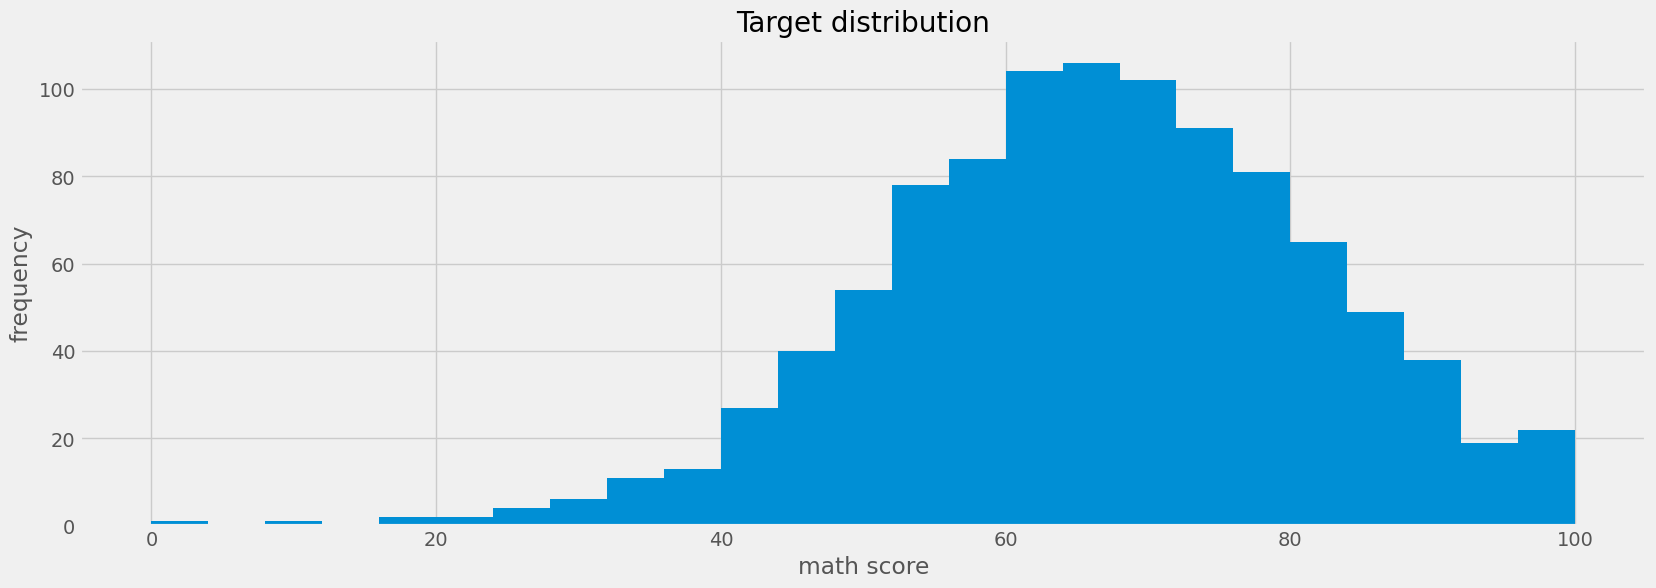

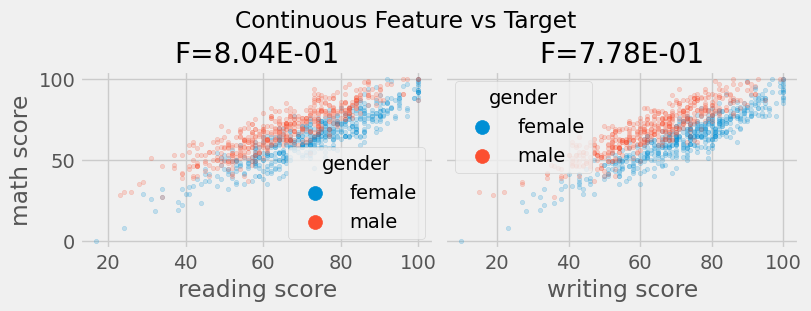

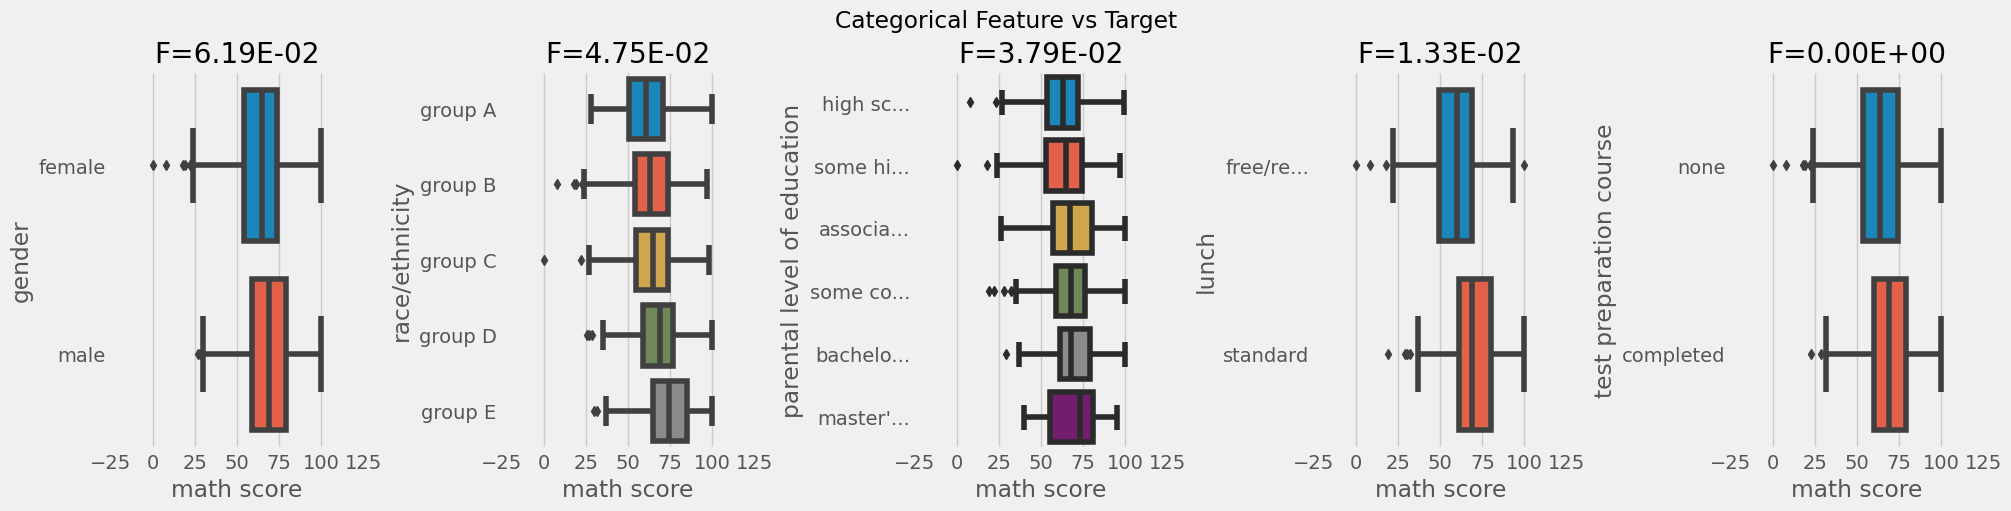

In [31]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
import dabl
dabl.plot(data, target_col = 'math score')

In [32]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [33]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

In [34]:
# plt.rcParams['figure.figsize'] = (15, 5)
# # Convert 'gender' column to categorical type
# data['gender'] = data['gender'].astype('category')

# sns.countplot(data['gender'], palette='bone')
# plt.title('Comparison of Males and Females', fontweight=30)
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.show()
print(data['gender'].unique())
print(data['gender'].isnull().sum())

['female' 'male']
0


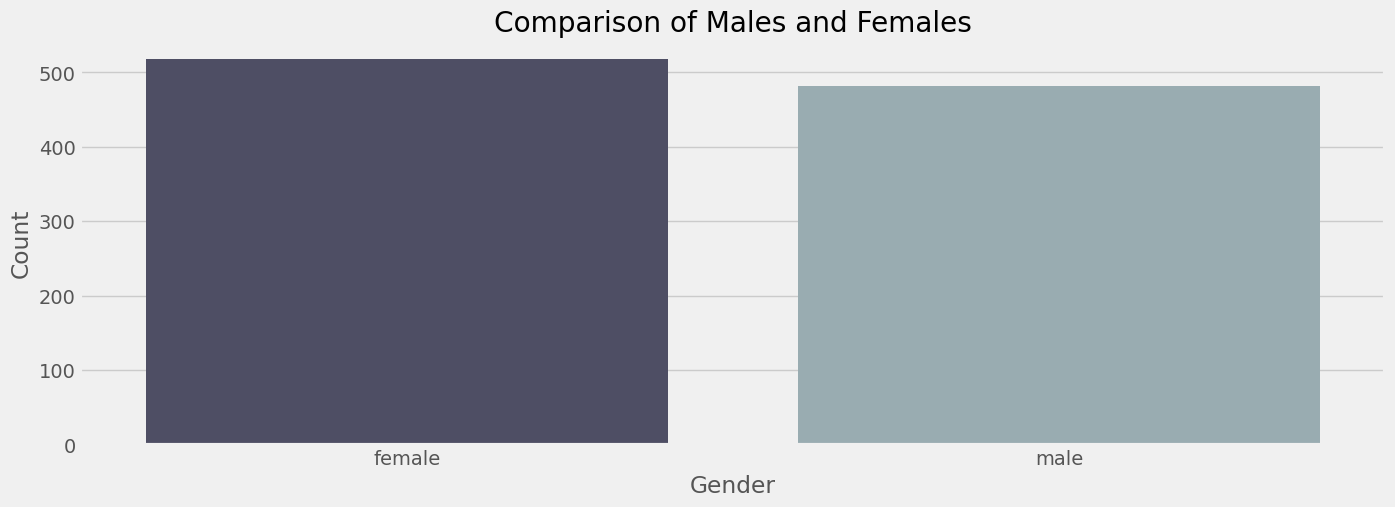

In [35]:


plt.rcParams['figure.figsize'] = (15, 5)
# Convert 'gender' column to string data type
data['gender'] = data['gender'].astype(str)

gender_counts = data['gender'].value_counts()

sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='bone')
plt.title('Comparison of Males and Females', fontweight=30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


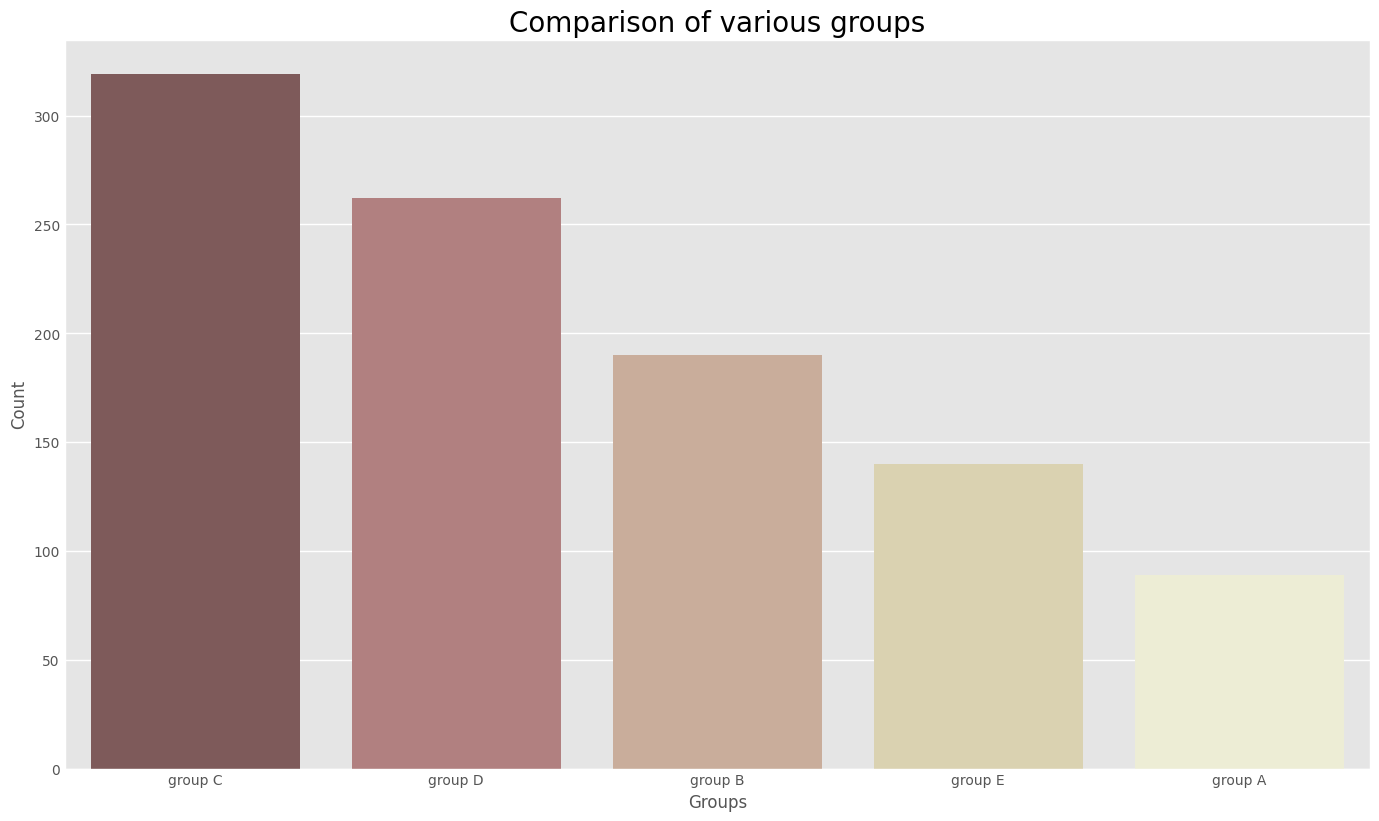

In [36]:


plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

# Count the occurrences of each group
group_counts = data['race/ethnicity'].value_counts()

# Plot the count using a bar plot
sns.barplot(x=group_counts.index, y=group_counts.values, palette='pink')
plt.title('Comparison of various groups', fontweight=30, fontsize=20)
plt.xlabel('Groups')
plt.ylabel('Count')
plt.show()



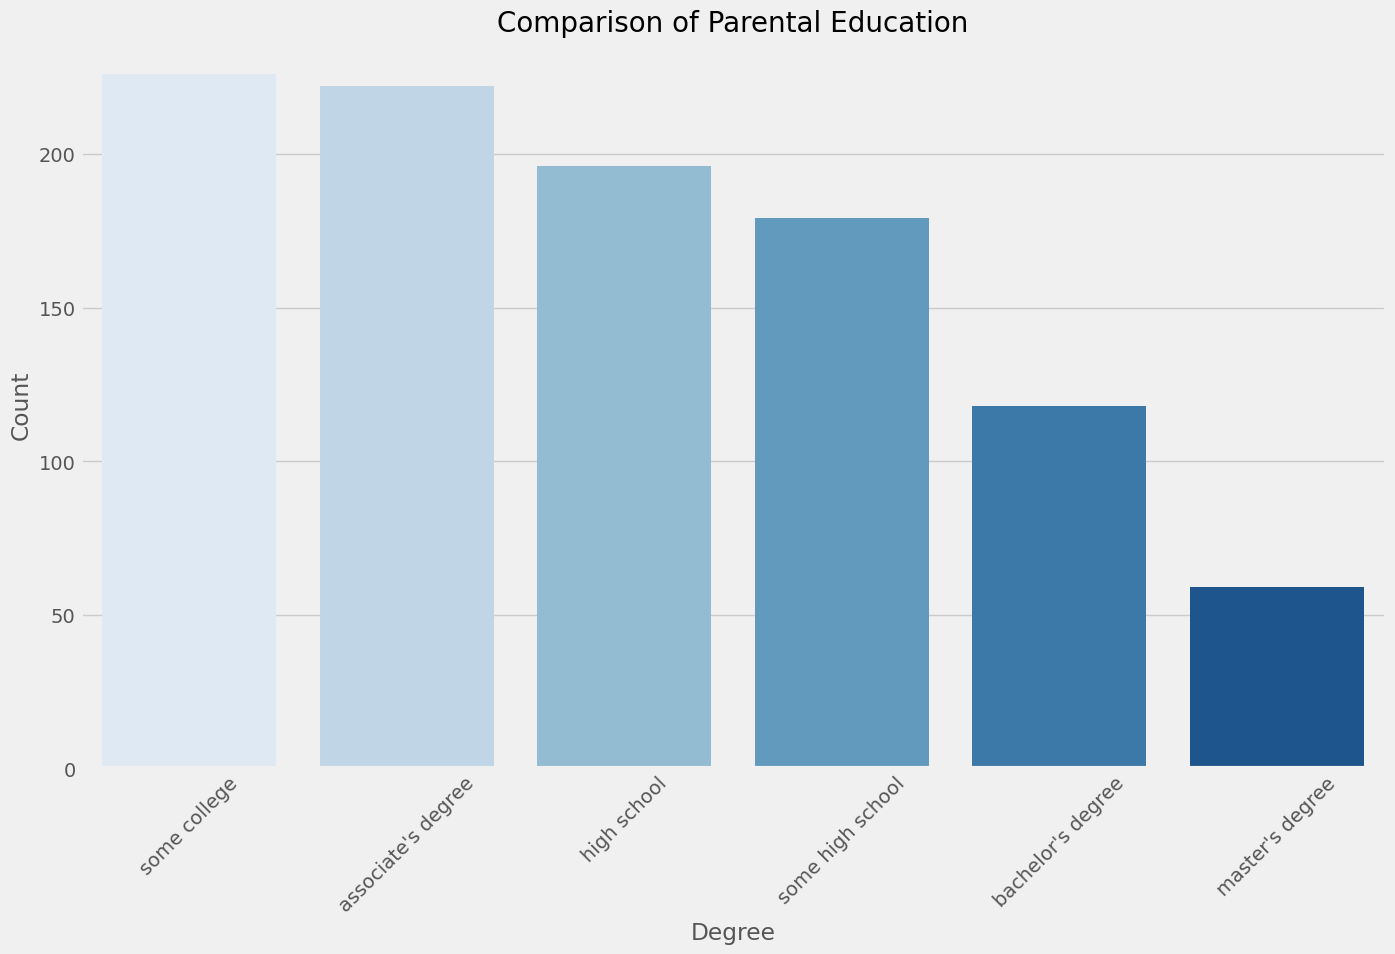

In [37]:

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Count the occurrences of each degree
degree_counts = data['parental level of education'].value_counts()

# Plot the count using a bar plot
sns.barplot(x=degree_counts.index, y=degree_counts.values, palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


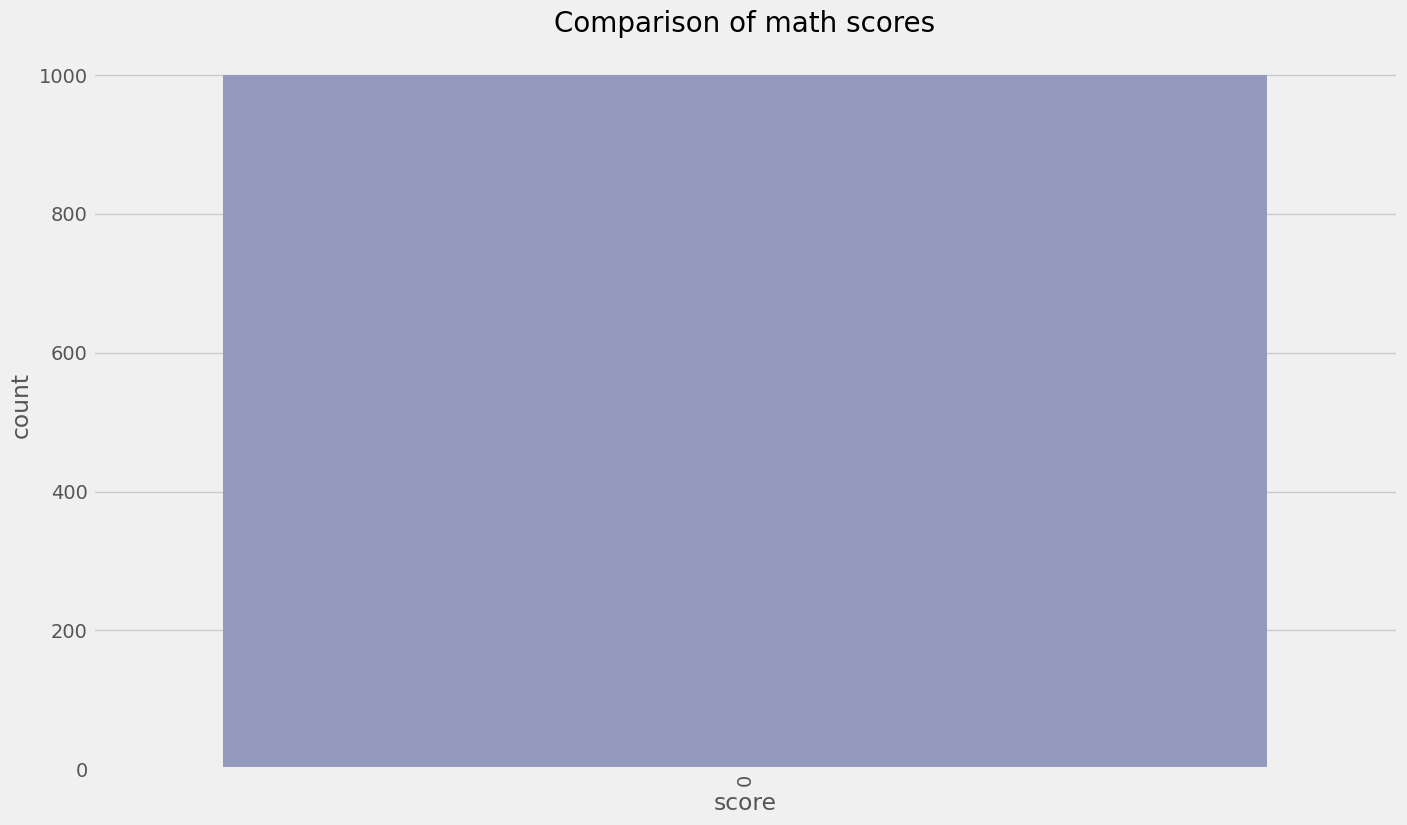

In [38]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

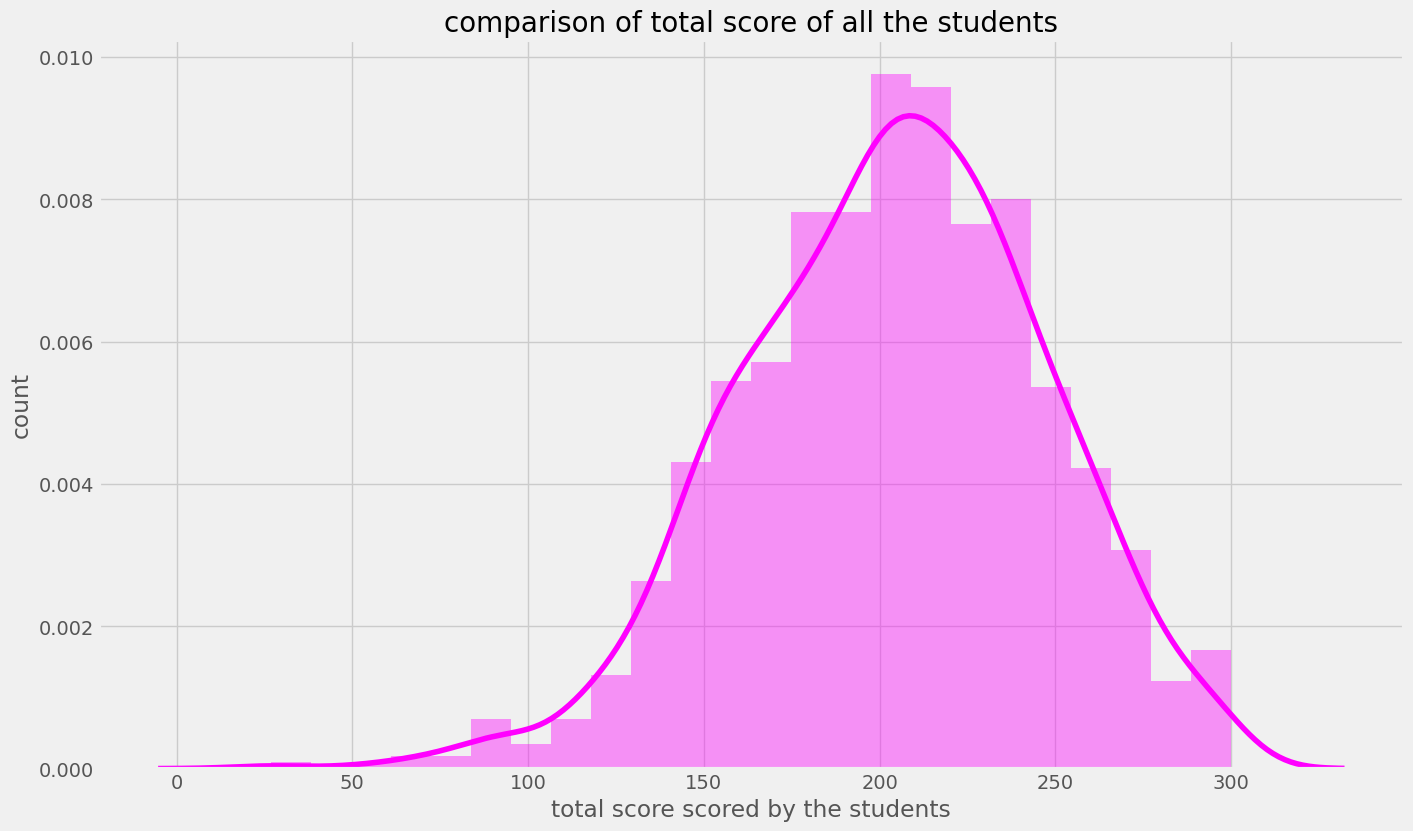

In [39]:
import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

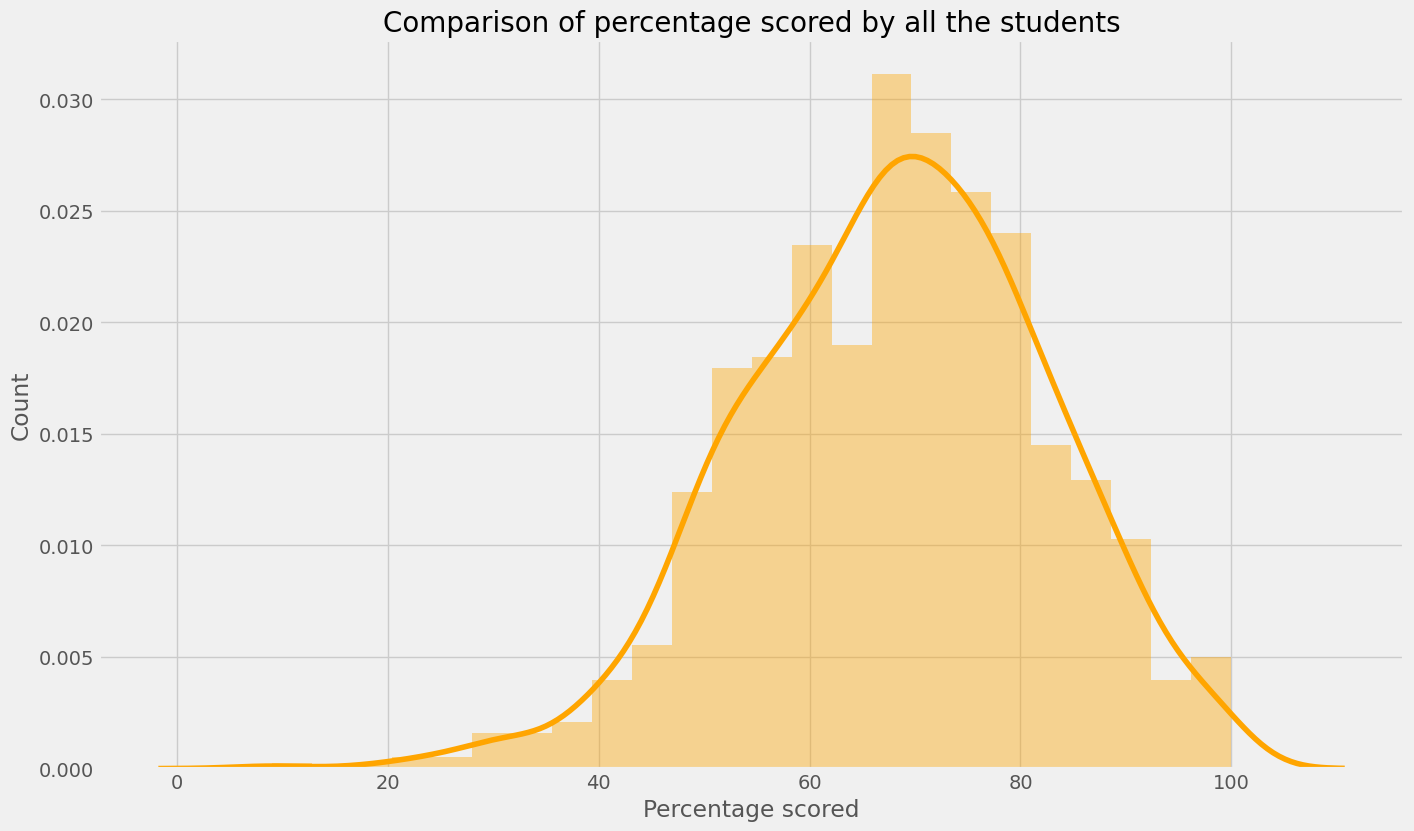

In [40]:
# importing math library to use ceil
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [41]:
def get_grade(percentage):
    if percentage < 40:
        return 'E'
    elif percentage < 60:
        return 'D'
    elif percentage < 70:
        return 'C'
    elif percentage < 80:
        return 'B'
    elif percentage < 90:
        return 'A'
    else:
        return 'O'

data['grades'] = data['percentage'].apply(get_grade)
grade_counts = data['grades'].value_counts()

print(grade_counts)


grades
B    260
C    252
D    248
A    156
O     58
E     26
Name: count, dtype: int64


In [42]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()
data['pass_math'] = np.where(data['math score'] >= 40, 1, 0)
data['pass_reading'] = np.where(data['reading score'] >= 40, 1, 0)
data['pass_writing'] = np.where(data['writing score'] >= 40, 1, 0)
# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_math'] = le.fit_transform(data['pass_math'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for status


In [43]:
x = data.iloc[:,:13]
y = data.iloc[:,13]

print(x.shape)
print(y.shape)

(1000, 13)
(1000,)


In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 13)
(750,)
(250, 13)
(250,)


In [45]:
non_numeric_columns = data.select_dtypes(exclude='number').columns

# Print the column names
print(non_numeric_columns)

Index(['grades'], dtype='object')


In [46]:


from sklearn.preprocessing import MinMaxScaler

# Identify categorical columns
categorical_cols = ['race/ethnicity', 'grades']

# Perform one-hot encoding on categorical columns
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols)

# Extract numerical columns for scaling
numerical_cols = [col for col in x_train_encoded.columns if col not in categorical_cols]

# Creating a scaler
mm = MinMaxScaler()

# Scaling the numerical columns
x_train_encoded[numerical_cols] = mm.fit_transform(x_train_encoded[numerical_cols])
x_test_encoded[numerical_cols] = mm.transform(x_test_encoded[numerical_cols])
# # Identify categorical columns
# categorical_cols = ['race/ethnicity', 'grades']
# x_train = mm.fit_transform(x_train)
# x_test = mm.transform(x_test)
# # Perform one-hot encoding
# x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols)
# x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols)

# # Importing the MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler

# # Creating a scaler
# mm = MinMaxScaler()

# # Scaling the numerical columns
# numerical_cols = [col for col in x_train_encoded.columns if col not in categorical_cols]
# x_train_encoded[numerical_cols] = mm.fit_transform(x_train_encoded[numerical_cols])
# x_test_encoded[numerical_cols] = mm.transform(x_test_encoded[numerical_cols])



In [47]:
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import  LogisticRegression

# Identify categorical columns
categorical_cols = ['race/ethnicity', 'grades']

# Perform one-hot encoding on categorical columns
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols)
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols)

# Extract numerical columns for scaling
numerical_cols = [col for col in x_train_encoded.columns if col not in categorical_cols]

# Creating a scaler
mm = MinMaxScaler()

# Scaling the numerical columns
x_train_encoded[numerical_cols] = mm.fit_transform(x_train_encoded[numerical_cols])
x_test_encoded[numerical_cols] = mm.transform(x_test_encoded[numerical_cols])

# Creating a Random Forest classifier
model = LogisticRegression()

# Fitting the model to the training data
model.fit(x_train_encoded, y_train)

# Predicting on the test data
y_pred = model.predict(x_test_encoded)

# Calculating the accuracies
print("Training Accuracy:", model.score(x_train_encoded, y_train))
print("Testing Accuracy:", model.score(x_test_encoded, y_test))


Training Accuracy: 0.9933333333333333
Testing Accuracy: 0.98


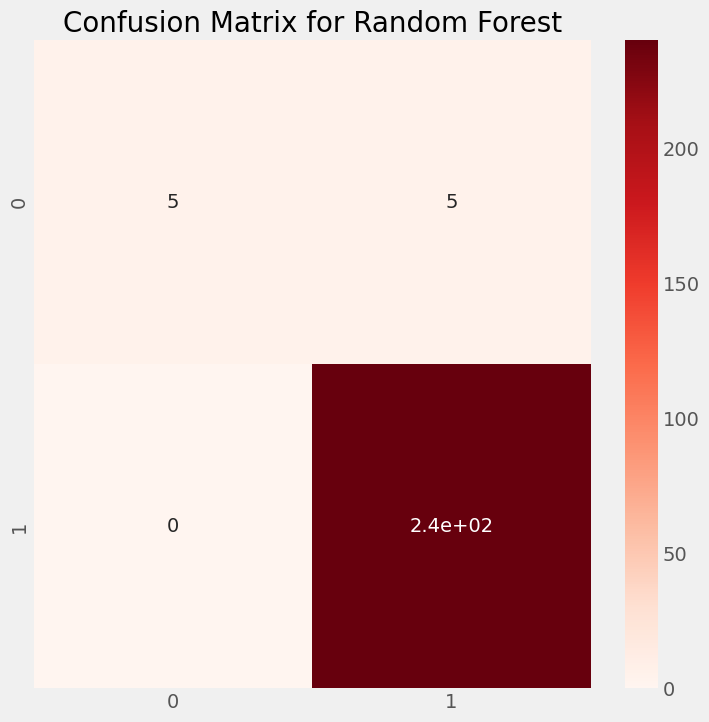

In [48]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

In [49]:
13

13